In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

In [2]:
class PriorityQueue:
    def __init__(self):
        self._queue = []
        self._index = 0

    def push(self, item, priority):
        heapq.heappush(self._queue, (priority, self._index, item))
        self._index += 1

    def pop(self):
        return heapq.heappop(self._queue)[-1]

    def empty(self):
        return len(self._queue) == 0


def prim(graph):
    start_node = list(graph.keys())[0]
    visited = set([start_node])
    mst = []

    pq = PriorityQueue()
    for neighbor, weight in graph[start_node].items():
        pq.push((start_node, neighbor, weight), weight)

    while not pq.empty():
        u, v, w = pq.pop()
        if v not in visited:
            visited.add(v)
            mst.append((u, v, w))
            for neighbor, weight in graph[v].items():
                if neighbor not in visited:
                    pq.push((v, neighbor, weight), weight)

    return mst


def visualize_graph(graph, node_positions, minimum_spanning_tree=None):
    G = nx.Graph()

    for u in graph:
        for v, w in graph[u].items():
            G.add_edge(u, v, weight=w)

    labels = nx.get_edge_attributes(G, 'weight')

    nx.draw_networkx(G, pos=node_positions, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    nx.draw_networkx_edge_labels(G, pos=node_positions, edge_labels=labels)

    if minimum_spanning_tree:
        mst_edges = [(u, v) for u, v, _ in minimum_spanning_tree]
        non_mst_edges = [edge for edge in G.edges() if edge not in mst_edges]
        nx.draw_networkx_edges(G, pos=node_positions, edgelist=mst_edges, edge_color='red', width=2.0)
        nx.draw_networkx_edges(G, pos=node_positions, edgelist=non_mst_edges, edge_color='black', width=1.0)

    plt.title("Minimum Spanning Tree")
    plt.show()

In [3]:
# Define the graph
graph = {
    'A': {'C': 4, 'B': 8},
    'B': {'A': 8, 'C': 11, 'D': 7, 'E': 1},
    'C': {'A': 4, 'B': 11, 'F': 8},
    'D': {'B': 7, 'E': 6, 'F': 2},
    'E': {'B': 1, 'D': 6, 'G': 2},
    'F': {'C': 8, 'D': 2, 'G': 4, 'H': 7},
    'G': {'E': 2, 'F': 4, 'I': 10},
    'H': {'F': 7, 'I': 9},
    'I': {'G': 10, 'H': 9}
}

In [4]:
# Manually specify the positions of the nodes and rotate 90 degrees to the left
node_positions = {
    'A': (-1, 5),
    'B': (-2, 4),
    'C': (0, 4),
    'D': (-1, 3),
    'E': (-2, 2),
    'F': (0, 2),
    'G': (-2, 1),
    'H': (0, 1),
    'I': (-1, 0)
}

In [5]:
minimum_spanning_tree = prim(graph)

print("Minimum Spanning Tree according to Prim:")
for u, v, w in minimum_spanning_tree:
    print(f"Edge: {u} -- {v}, Weight: {w}")

Minimum Spanning Tree according to Prim:
Edge: A -- C, Weight: 4
Edge: A -- B, Weight: 8
Edge: B -- E, Weight: 1
Edge: E -- G, Weight: 2
Edge: G -- F, Weight: 4
Edge: F -- D, Weight: 2
Edge: F -- H, Weight: 7
Edge: H -- I, Weight: 9


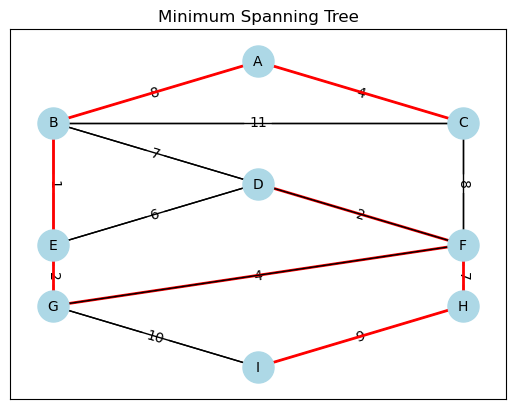

In [6]:
visualize_graph(graph, node_positions, minimum_spanning_tree)